# Task 2: Customer Segmentation Using K-Means

**Objective:** Cluster customers based on spending habits and propose marketing strategies per segment.

**Methods:** EDA, K-Means, PCA visualization, strategy recommendations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
DATA_PATH = "Mall_Customers.csv"  # update path
df = pd.read_csv(DATA_PATH)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T)

# Common columns: 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
cols = [c for c in df.columns if c.lower() not in ["customerid", "customer id"]]
df[cols].head()


Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Keep it simple: use numeric behavioral features
use_cols = [c for c in df.columns if df[c].dtype != "object" and "Customer" not in c]
X = df[use_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

use_cols


['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

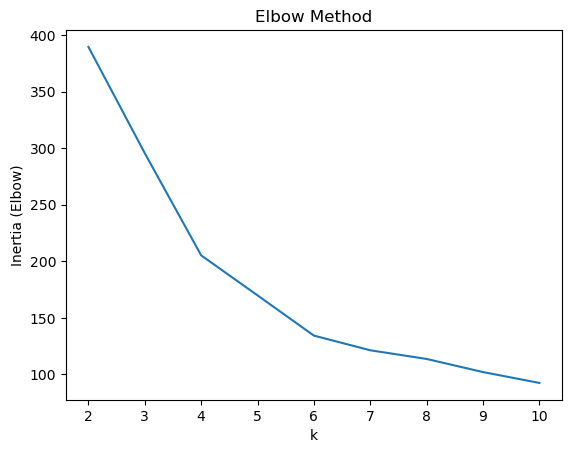

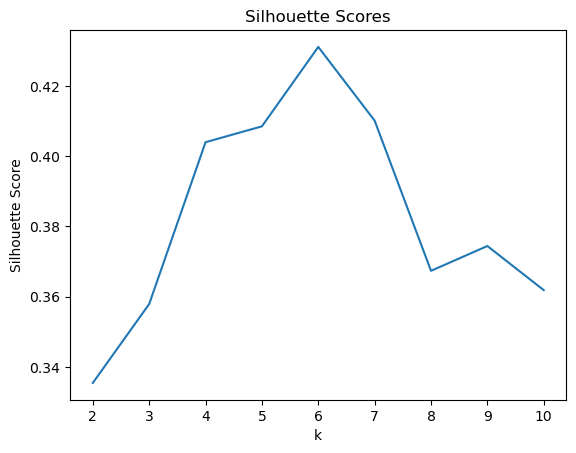

6

In [5]:
inertias = []
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(list(k_values), inertias)
plt.xlabel("k")
plt.ylabel("Inertia (Elbow)")
plt.title("Elbow Method")
plt.show()

plt.plot(list(k_values), sil_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

best_k = int(k_values[np.argmax(sil_scores)])
best_k


In [6]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("cluster")[use_cols].mean().round(2)
cluster_counts = df["cluster"].value_counts().sort_index()

display(cluster_summary)
display(cluster_counts)


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,56.33,54.27,49.07
1,32.69,86.54,82.13
2,25.56,26.48,76.24
3,26.12,59.42,44.45
4,44.00,90.13,17.93
5,45.52,26.29,19.38


cluster
0    45
1    39
2    25
3    40
4    30
5    21
Name: count, dtype: int64

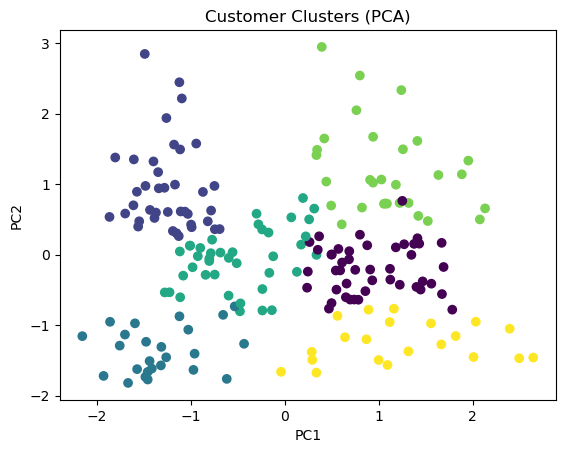

Explained variance ratio: [0.44266167 0.33308378] Total: 0.7757454566976747


In [7]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (PCA)")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_, "Total:", pca.explained_variance_ratio_.sum())


## Marketing Strategies by Cluster

For each cluster:
- Describe typical profile (based on mean Age / Income / Spending Score etc.)
- Suggest actions (loyalty program, bundles, premium upsell, discounts, personalized offers)

Example strategy ideas:
- High income + high spending → premium membership, concierge support, exclusive launches  
- High income + low spending → targeted upsell, personalized recommendations  
- Low income + high spending → bundles, discounts, referral programs  
- Low income + low spending → awareness campaigns, low-price essentials


In [9]:
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,56.33,54.27,49.07
1,32.69,86.54,82.13
2,25.56,26.48,76.24
3,26.12,59.42,44.45
4,44.00,90.13,17.93
5,45.52,26.29,19.38
